<a href="https://colab.research.google.com/github/Saurav-Raghaw/Python/blob/main/PyTorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
############################________Linear Regression With PyTorch FrameWork Without Built-in function__________###############################

In [164]:
import numpy as np
import torch

In [165]:
#Training Data

# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')
print(inputs)
print('\n')
print(inputs.shape, inputs.dtype)

##In case od some CSV/Excel file we'll read that files as numpy arrays, do some processing, and then we'll convert them to PyTorch tensors.

[[ 73.  67.  43.]
 [ 91.  88.  64.]
 [ 87. 134.  58.]
 [102.  43.  37.]
 [ 69.  96.  70.]]


(5, 3) float32


In [166]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

print(targets)
print('\n')
print(targets.shape, targets.dtype)

[[ 56.  70.]
 [ 81. 101.]
 [119. 133.]
 [ 22.  37.]
 [103. 119.]]


(5, 2) float32


In [167]:
# Convert inputs and targets to tensors
input = torch.from_numpy(inputs) #Or torch.tensor(inputs)
target = torch.from_numpy(targets)
print(input)
print(target)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


*   Our model is simply a function that performs a matrix multiplication of the inputs and the weights w (transposed) and adds the bias b (replicated for each observation).



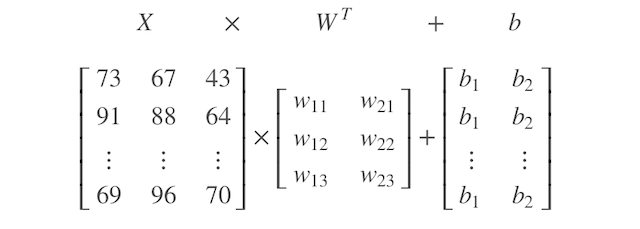

In [168]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w, w.shape)
print(b, b.shape)

#torch.randn creates a tensor with the given shape, with elements picked randomly from a normal distribution with mean 0 and standard deviation 1.

tensor([[0.8836, 0.1179, 0.5927],
        [0.2894, 0.2254, 0.2299]], requires_grad=True) torch.Size([2, 3])
tensor([1.3703, 0.0164], requires_grad=True) torch.Size([2])


In [169]:
#Defining the model.
def model(x):
    return x @ w.t() + b

# @ represents matrix multiplication in PyTorch, and the .t method returns the transpose of a tensor.

#The matrix obtained by passing the input data into the model is a set of predictions for the target variables.

In [170]:
# Generate predictions
prediction_ = model(input)
print(prediction_)

#Comaparing with the actual output/Target.
print('\n')
print(target)
print('\n')
print('We can see a big difference between our model\'s predictions and the actual targets. Why?')

tensor([[ 99.2592,  46.1274],
        [130.0867,  60.8969],
        [128.4218,  68.7264],
        [118.4966,  47.7326],
        [115.1474,  57.7119]], grad_fn=<AddBackward0>)


tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


We can see a big difference between our model's predictions and the actual targets. Why?


In [171]:
#Because we've initialized our model with random weights and biases. Obviously, we can't expect a randomly initialized model to just work.'

#Loss function
Before we improve our model, we need a way to evaluate how well our model is performing. \\
We can compare the model's predictions with the actual targets using the following method:

*  Calculate the difference between the two matrices (preds and targets).

*  Square all elements of the difference matrix to remove negative values.

*  Calculate the average of the elements in the resulting matrix.

The result is a single number, known as the mean squared error (MSE).





In [172]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff)/ diff.numel()

#torch.sum returns the sum of all the elements in a tensor. 
#The .numel method of a tensor returns the number of elements in a tensor.

In [173]:
# Compute loss
loss = mse(prediction_, target)
print(loss)

#The result is called the loss because it indicates how bad the model is at predicting the target variables. 
#It represents information loss in the model: the lower the loss, the better the model.

tensor(2400.9456, grad_fn=<DivBackward0>)


In [174]:
#Computing the Gradients.
#With PyTorch, we can automatically compute the gradient or derivative of the loss w.r.t. to the weights and biases 
#because they have requires_grad set to True.

loss.backward()

#The gradients are stored in the .grad property of the respective tensors. Note that the derivative of the loss w.r.t. 
#the weights matrix is itself a matrix with the same dimensions.

In [175]:
# Gradients for weights
print(w, w.shape)
print(w.grad, w.grad.shape)

tensor([[0.8836, 0.1179, 0.5927],
        [0.2894, 0.2254, 0.2299]], requires_grad=True) torch.Size([2, 3])
tensor([[ 3825.0654,  2759.2034,  1993.7695],
        [-2823.6074, -3832.6709, -2242.8098]]) torch.Size([2, 3])


In [176]:
#Adusting the weigths and biases to minimize the loss.
#The loss is a quadratic function of our weights and biases, and our objective is to find the set of weights where the loss is the lowest. 

An important insight from calculus is that the gradient indicates the rate of change of the loss, i.e., the loss function's slope w.r.t. the weights and biases.

If a gradient element is positive:

*  increasing the weight element's value slightly will increase the loss
*  decreasing the weight element's value slightly will decrease the loss

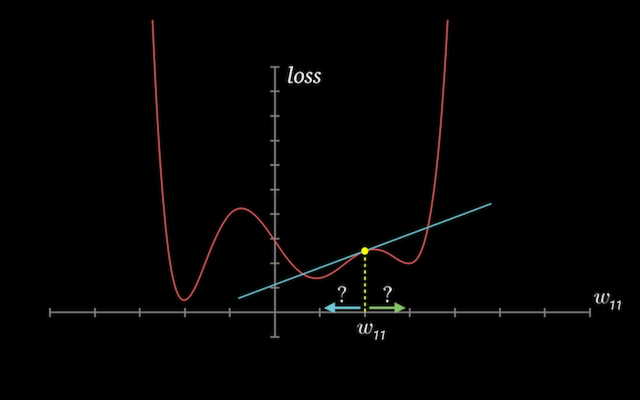

If a gradient element is negative:

*  increasing the weight element's value slightly will decrease the loss
*  decreasing the weight element's value slightly will increase the loss

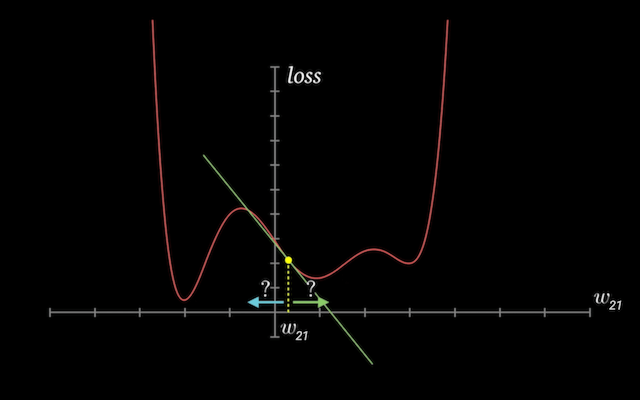


#Learning Rate
*  We multiply the gradients with a very small number to ensure that we don't modify the weights by a very large amount. We want to take a small step in the downhill direction of the gradient, not a giant leap. This number is called the learning rate of the algorithm.

In [177]:
#We can subtract from each weight element a small quantity proportional to the derivative/gradient of the loss w.r.t. 
#that element to reduce the loss slightly.

with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

#We use torch.no_grad to indicate to PyTorch that we shouldn't track, calculate, or modify gradients while updating the weights and biases.

In [178]:
print(loss)

tensor(2400.9456, grad_fn=<DivBackward0>)


In [179]:
# Let's verify that the loss is actually lower
loss = mse(prediction_, target)
print(loss)

#But Loss is same.

tensor(2400.9456, grad_fn=<DivBackward0>)


*  Before we proceed, we reset the gradients to zero by invoking the .zero_() method. We need to do this because PyTorch accumulates gradients. Otherwise, the next time we invoke .backward on the loss, the new gradient values are added to the existing gradients, which may lead to unexpected results.

In [180]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


#Gradient Descent(Training of Model)


1.   Generate predictions

2.   Calculate the loss

3.   Compute gradients w.r.t the weights and biases

4.   Adjust the weights by subtracting a small quantity proportional to the gradient

In [181]:
# 1. Generatint the predictions
prediction_ = model(input)
print(prediction_)

tensor([[ 93.7605,  51.7213],
        [122.9014,  68.2749],
        [120.2398,  77.6199],
        [112.6704,  53.0909],
        [108.4632,  64.9099]], grad_fn=<AddBackward0>)


In [182]:
# 2. Calculating the loss
loss = mse(prediction_, target)
print(loss)

tensor(1909.0750, grad_fn=<DivBackward0>)


In [183]:
# 3. Computint the gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ 3260.5503,  2161.3416,  1622.9058],
        [-2244.2681, -3205.2312, -1856.6760]])
tensor([ 35.4071, -28.8766])


In [184]:
# 4. Adjusting weights & reseting gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [185]:
#New weigths and bias
print(w)
print(b)

tensor([[0.8127, 0.0687, 0.5565],
        [0.3401, 0.2957, 0.2709]], requires_grad=True)
tensor([1.3695, 0.0170], requires_grad=True)


In [186]:
# Calculating the loss
prediction_ = model(input)
loss = mse(prediction_, target)
print(loss)

#Lower loss than previous.

tensor(1573.9858, grad_fn=<DivBackward0>)


In [187]:
#To reduce the loss further, we can repeat the process of adjusting the weights and biases using the gradients multiple times. 
#Each iteration is called an epoch.

# Training for 200 epochs.
for i in range(200):
    prediction_ = model(input)  #Step 1.
    loss = mse(prediction_, target)  #Step 2.
    loss.backward()  #Step 3.
    with torch.no_grad():    #Step 4.
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [188]:
# Calculating the loss
prediction_ = model(input)
loss = mse(prediction_, target)
print(loss)

tensor(80.4026, grad_fn=<DivBackward0>)


In [189]:
#Comparing with target.
print(prediction_)
print('\n')
print(target)
print('\n')
print('The predictions are now quite close to the target variables. We can get even better results by training for a few more epochs.')

tensor([[ 60.6426,  72.5758],
        [ 83.9703,  99.0677],
        [109.0964, 132.9588],
        [ 39.9094,  49.8595],
        [ 94.2695, 108.8577]], grad_fn=<AddBackward0>)


tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


The predictions are now quite close to the target variables. We can get even better results by training for a few more epochs.
